In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [34]:
df = pd.read_csv(r"D:\Learnerea\Tables\cancer_data.csv")
display(df.shape)
display(df.head())

(569, 32)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Treatment

In [37]:
cancerDf = df.drop('id',axis=1)
cancerDf['diagnosis'] = np.where(cancerDf['diagnosis']=="M",1,0)
cancerDf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
inputs = cancerDf.drop('diagnosis',axis=1)
target = cancerDf['diagnosis']
# target.head()

## Model Training & Testing

In [41]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=42)

## Feature Selection with Correlation Method

<Axes: >

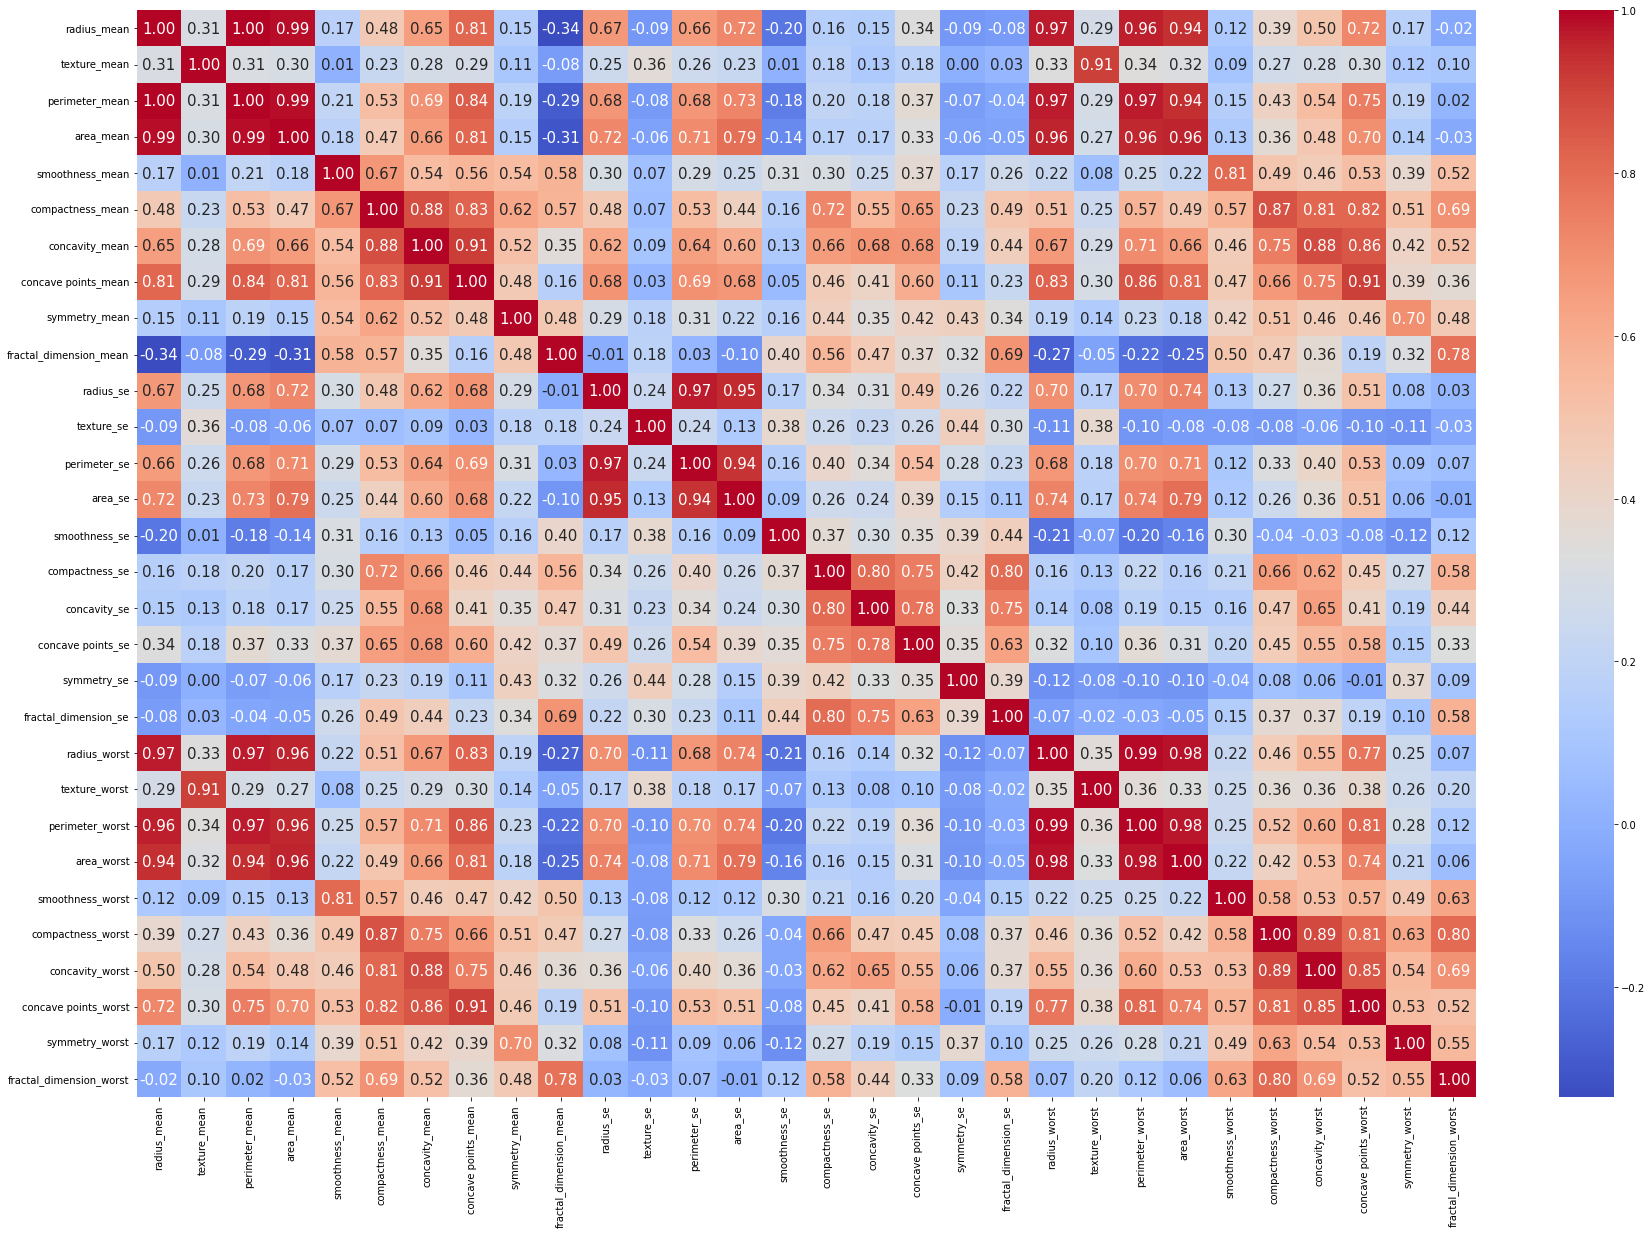

In [80]:
corrDf = x_train.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corrDf,annot=True,fmt='.2f',annot_kws=dict(size=15),cmap='coolwarm')

In [82]:
def highlight_corr(values):
    color = 'red' if values >=0.9 else ''
    return f'background-color: {color}'

In [83]:
highlighted_corr = corrDf.style.applymap(highlight_corr)
highlighted_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575,0.666954,-0.092185,0.656071,0.719478,-0.200747,0.159568,0.147813,0.335335,-0.093306,-0.075575,0.969134,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337
texture_mean,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010,0.249347,0.355512,0.256270,0.229760,0.011832,0.179560,0.127708,0.180879,0.003095,0.033886,0.332908,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868
perimeter_mean,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307,0.680739,-0.081127,0.676192,0.729937,-0.180747,0.204700,0.181934,0.368587,-0.074067,-0.039047,0.969620,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731
area_mean,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321,0.722728,-0.059001,0.710713,0.788217,-0.142247,0.170306,0.166429,0.334764,-0.061512,-0.049310,0.960519,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035
smoothness_mean,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171,0.298105,0.071550,0.291915,0.249452,0.311582,0.303096,0.246932,0.373731,0.166833,0.260320,0.223284,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392
compactness_mean,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638,0.482867,0.065216,0.534119,0.435444,0.159415,0.724415,0.554362,0.649575,0.226999,0.493149,0.514854,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960
concavity_mean,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280,0.615554,0.093922,0.642794,0.597401,0.127219,0.655682,0.683196,0.680136,0.192412,0.443497,0.665091,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451
concave points_mean,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184,0.684833,0.031771,0.694657,0.675184,0.047770,0.458476,0.413601,0.596006,0.107712,0.228505,0.827695,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804
symmetry_mean,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673,0.292071,0.176502,0.305440,0.217612,0.162629,0.440439,0.351501,0.415884,0.432726,0.341347,0.192004,0.138865,0.229285,0.183576,0.416854,0.508593,0.461163,0.464676,0.699251,0.476875
fractal_dimension_mean,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000,-0.008286,0.182955,0.030467,-0.096313,0.397514,0.563875,0.469671,0.371233,0.322451,0.685384,-0.271858,-0.053244,-0.221453,-0.246204,0.495491,0.467774,0.364380,0.186256,0.317793,0.784537


In [52]:
corr_pairs=[]
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i,j]>0.9:
            corr_pairs.append((corr.columns[i],corr.columns[j],corr.iloc[i,j]))
corr_pairs

[('perimeter_mean', 'radius_mean', 0.9978552814938109),
 ('area_mean', 'radius_mean', 0.9873571700566127),
 ('area_mean', 'perimeter_mean', 0.9865068039913907),
 ('concave points_mean', 'concavity_mean', 0.9213910263788588),
 ('perimeter_se', 'radius_se', 0.9727936770160764),
 ('area_se', 'radius_se', 0.951830112110991),
 ('area_se', 'perimeter_se', 0.9376554069544157),
 ('radius_worst', 'radius_mean', 0.9695389726112055),
 ('radius_worst', 'perimeter_mean', 0.9694763634663146),
 ('radius_worst', 'area_mean', 0.9627460860470841),
 ('texture_worst', 'texture_mean', 0.912044588840421),
 ('perimeter_worst', 'radius_mean', 0.9651365139559871),
 ('perimeter_worst', 'perimeter_mean', 0.9703868870426394),
 ('perimeter_worst', 'area_mean', 0.9591195743552645),
 ('perimeter_worst', 'radius_worst', 0.993707916102949),
 ('area_worst', 'radius_mean', 0.9410824595860461),
 ('area_worst', 'perimeter_mean', 0.9415498080023068),
 ('area_worst', 'area_mean', 0.9592133256498998),
 ('area_worst', 'radius

In [56]:
features_to_drop = []
for i,j,k in corr_pairs:
    features_to_drop.append(i)
    
features_to_drop = list(set(features_to_drop))
features_to_drop

['texture_worst',
 'concave points_mean',
 'perimeter_se',
 'area_mean',
 'concave points_worst',
 'radius_worst',
 'area_worst',
 'perimeter_worst',
 'area_se',
 'perimeter_mean']

In [61]:
x_train_selected = x_train.drop(features_to_drop,axis=1)
x_test_selected = x_test.drop(features_to_drop,axis=1)

In [62]:
logit = LogisticRegression()

In [63]:
logit.fit(x_train,y_train)

LogisticRegression()

In [64]:
prediction = logit.predict(x_test)

In [66]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [67]:
logitSelected = LogisticRegression()

In [69]:
logitSelected.fit(x_train_selected,y_train)

LogisticRegression()

In [71]:
x_test_selected.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,0.09965,0.1058,0.08005,0.1925,0.06373,0.3961,1.0440,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,0.1426,0.2378,0.2671,0.3014,0.08750
70,18.94,21.31,0.09009,0.1029,0.10800,0.1582,0.05461,0.7888,0.7975,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,0.1193,0.2336,0.2687,0.2551,0.06589
131,15.46,19.48,0.10920,0.1223,0.14660,0.1931,0.05796,0.4743,0.7859,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,0.1546,0.2394,0.3791,0.2837,0.08019
431,12.40,17.68,0.10540,0.1316,0.07741,0.1811,0.07102,0.1767,1.4600,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,0.1450,0.2629,0.2403,0.2556,0.09359
540,11.54,14.44,0.09984,0.1120,0.06737,0.1818,0.06782,0.2784,1.7680,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,0.1345,0.2118,0.1797,0.2329,0.08134


In [72]:
predSelected = logitSelected.predict(x_test_selected)

In [73]:
print(classification_report(y_test,predSelected))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

